<a href="https://colab.research.google.com/github/GU-DPM/EvolutionaryClassifier/blob/main/archive/EC_classifier_revision3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
from google.colab import data_table
data_table.enable_dataframe_formatter()
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 2.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=e6f0219835773d88e2c67e9980087986ed8ccb111c7201c5b47e5ecbcc595c17
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter

from lifelines.plotting import add_at_risk_counts

from google.cloud import bigquery
project = 'mccoylab' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)



'''def plot_km(df, population_id=None, file_path=None):
    # Check if the file path is provided and if the file already exists
    if file_path and os.path.exists(file_path):
        print(f"The plot already exists at {file_path}. Displaying the plot.")
        img = plt.imread(file_path)
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.show()
        return

    kmf = KaplanMeierFitter()
    # Plot survival curves for each Survival column for the subset
    plt.figure(figsize=(10, 6))

    for column in ['Survival_CPM', 'Survival_DPM', 'Survival_DPMtrial']:
        kmf.fit(df[column], event_observed=[1]*len(df))  # Adjust event_observed if needed
        kmf.plot_survival_function(label=column)

    plt.title(f'Survival Curves for {population_id} (n={len(df)})', fontsize=20)
    plt.xlabel('Days', fontsize=16)
    plt.ylabel('Survival Probability', fontsize=16)
    plt.legend(fontsize=18)

    # Save the plot to the specified file path if provided, otherwise just show the plot
    if file_path:
        plt.savefig(file_path)
        print(f"The plot has been saved to {file_path}.")
    else:
        plt.show()

def plot_km(df, population_id=None, file_path=None):
    # Check if the file path is provided and if the file already exists
    if file_path and os.path.exists(file_path):
        print(f"The plot already exists at {file_path}. Displaying the plot.")
        img = plt.imread(file_path)
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.show()
        return

    kmf = KaplanMeierFitter()
    # Plot survival curves for each Survival column for the subset
    plt.figure(figsize=(10, 6))

    # Define a mapping from old labels to new labels
    label_mapping = {
        'Survival_CPM': 'CPM',
        'Survival_DPM': '40-move DPM',
        'Survival_DPMtrial': '2-move DPM'
    }

    for column in ['Survival_CPM', 'Survival_DPM', 'Survival_DPMtrial']:
        kmf.fit(df[column], event_observed=[1]*len(df))  # Adjust event_observed if needed
        kmf.plot_survival_function(label=label_mapping[column])

    plt.title(f'Survival Curves for {population_id} (n={len(df)})', fontsize=20)
    plt.xlabel('Days', fontsize=16)
    plt.ylabel('Survival Probability', fontsize=16)
    plt.legend(fontsize=18)

    # Save the plot to the specified file path if provided, otherwise just show the plot
    if file_path:
        plt.savefig(file_path)
        print(f"The plot has been saved to {file_path}.")
    else:
        plt.show()
'''

def plot_km(df, population_id=None, file_path=None):
    # Check if the file path is provided and if the file already exists
    if file_path and os.path.exists(file_path):
        print(f"The plot already exists at {file_path}. Displaying the plot.")
        img = plt.imread(file_path)
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.show()
        return

    kmf = KaplanMeierFitter()
    # Plot survival curves for each Survival column for the subset
    plt.figure(figsize=(10, 6))

    # Define a mapping from old labels to new labels
    label_mapping = {
        'Survival_CPM': 'CPM',
        'Survival_DPM': '40-move DPM',
        'Survival_DPMtrial': '2-move DPM'
    }

    ax = plt.subplot(111)
    kmf_CPM = KaplanMeierFitter()
    ax = kmf_CPM.fit(df['Survival_CPM'], event_observed=[1]*len(df), label='CPM').plot_survival_function(ax=ax)
    kmf_DPM = KaplanMeierFitter()
    ax = kmf_DPM.fit(df['Survival_DPM'], event_observed=[1]*len(df), label='40-move DPM').plot_survival_function(ax=ax)
    kmf_DPMtrial = KaplanMeierFitter()
    ax = kmf_DPMtrial.fit(df['Survival_DPMtrial'], event_observed=[1]*len(df), label='2-move DPM').plot_survival_function(ax=ax)

    add_at_risk_counts(kmf_CPM, kmf_DPM, kmf_DPMtrial, ax=ax)


    #for column in ['Survival_CPM', 'Survival_DPM', 'Survival_DPMtrial']:
    #    kmf.fit(df[column], event_observed=[1]*len(df))
    #    kmf.plot_survival_function(label=label_mapping[column])

    plt.title(f'Survival Curves for {population_id} (n={len(df)})', fontsize=20)
    plt.xlabel('Days', fontsize=16)
    plt.ylabel('Survival Probability', fontsize=16)
    plt.legend(fontsize=18)

    # Save the plot to the specified file path if provided, otherwise just show the plot
    if file_path:
        plt.savefig(file_path)
        print(f"The plot has been saved to {file_path}.")
    else:
        plt.show()


def calc_hazard_ratio(df, population_id=None, file_path=None):
    # Check if the file path is provided and if the file already exists
    if file_path and os.path.exists(file_path):
        print(f"The file already exists at {file_path}. Loading and printing the content.")
        with open(file_path, 'r') as f:
            print(f.read())
        return

    # Prepare the data for PHReg to compare Survival_CPM and Survival_DPM
    df_long_cpm_dpm = pd.melt(df, id_vars=['Parameter_ID'], value_vars=['Survival_CPM', 'Survival_DPM'],
                              var_name='Survival_Type', value_name='Days')

    # Add an event column (assuming all events are observed)
    df_long_cpm_dpm['Event'] = 1

    # Convert categorical variable to dummy/indicator variables
    df_long_cpm_dpm = pd.get_dummies(df_long_cpm_dpm, columns=['Survival_Type'], drop_first=True)

    # Fit the Cox Proportional Hazards model
    cph_cpm_dpm = CoxPHFitter()
    cph_cpm_dpm.fit(df_long_cpm_dpm, duration_col='Days', event_col='Event', formula='Survival_Type_Survival_DPM')

    output = []

    if population_id:
        output.append(f"Hazard Ratio between Survival_CPM and Survival_DPM for {population_id}:")
    else:
        output.append("Hazard Ratio between Survival_CPM and Survival_DPM:")
    output.append(str(cph_cpm_dpm.summary))

    # Prepare the data for PHReg to compare Survival_CPM and Survival_DPMtrial
    df_long_cpm_dpmtrial = pd.melt(df, id_vars=['Parameter_ID'], value_vars=['Survival_CPM', 'Survival_DPMtrial'],
                                   var_name='Survival_Type', value_name='Days')

    # Add an event column (assuming all events are observed)
    df_long_cpm_dpmtrial['Event'] = 1

    # Convert categorical variable to dummy/indicator variables
    df_long_cpm_dpmtrial = pd.get_dummies(df_long_cpm_dpmtrial, columns=['Survival_Type'], drop_first=True)

    # Fit the Cox Proportional Hazards model
    cph_cpm_dpmtrial = CoxPHFitter()
    cph_cpm_dpmtrial.fit(df_long_cpm_dpmtrial, duration_col='Days', event_col='Event', formula='Survival_Type_Survival_DPMtrial')

    if population_id:
        output.append(f"\nHazard Ratio between Survival_CPM and Survival_DPMtrial for {population_id}:")
    else:
        output.append("\nHazard Ratio between Survival_CPM and Survival_DPMtrial:")
    output.append(str(cph_cpm_dpmtrial.summary))

    # Print the output to the screen
    print('\n'.join(output))

    if file_path:
        with open(file_path, 'w') as f:
            f.write('\n'.join(output))
        print(f"The output has been saved to {file_path}.")
    print('break')
    print(cph_cpm_dpm.summary)
    # Create a DataFrame with the hazard ratios and population_id
    hr_data = {
        'Comparison': ['Survival_CPM vs Survival_DPM', 'Survival_CPM vs Survival_DPMtrial'],
        'Hazard_Ratio': [cph_cpm_dpm.hazard_ratios_['Survival_Type_Survival_DPM'], cph_cpm_dpmtrial.hazard_ratios_['Survival_Type_Survival_DPMtrial']],
        'Population_ID': [population_id, population_id]
    }

    hr_df = pd.DataFrame(hr_data)

    return hr_df

#def calc_benefit(df, population_id=None):


def get_pop_by_EC_category(ec_categories=None):
    base_query = """
    SELECT
        Parameter_ID,
        Survival_CPM,
        Survival_DPM,
        Survival_DPMtrial,
        EC_category,
    FROM
        mccoylab.DPM_EC.ECsurvival_studyPopulation
    WHERE
        Survival_CPM > 0
    """

    if ec_categories:
        # Join the list of EC_category values into a comma-separated string
        categories_str = ', '.join(f"'{category}'" for category in ec_categories)
        query = f"{base_query} AND EC_category IN ({categories_str});"
    else:
        query = f"{base_query};"
    #print(query)
    query_population = client.query(query).to_dataframe()
    return query_population

def add_benefit_columns(df):
    # Calculate benefit_DPM
    df['benefit_DPM'] = (df['Survival_DPM'] - df['Survival_CPM'] >= 60) & ((df['Survival_DPM'] - df['Survival_CPM']) / df['Survival_CPM'] >= 0.25)

    # Calculate benefit_DPMtrial
    df['benefit_DPMtrial'] = (df['Survival_DPMtrial'] - df['Survival_CPM'] >= 60) & ((df['Survival_DPMtrial'] - df['Survival_CPM']) / df['Survival_CPM'] >= 0.25)

    # Calculate Extraordinary_Benefit
    df['Extraordinary_Benefit'] = df['benefit_DPMtrial'] & (df['Survival_DPM'] - df['Survival_DPMtrial'] >= 60) & ((df['Survival_DPM'] - df['Survival_DPMtrial']) / df['Survival_DPMtrial'] >= 0.25)

    return df

# Function to calculate true positive, false positive, true negative, and false negatives
def calculate_confusion_matrix(study_population, excluded_population):
    tp = sum(study_population['benefit_DPMtrial'])
    fp = len(study_population) - tp
    tn = sum(~excluded_population['benefit_DPMtrial'])
    fn = len(excluded_population) - tn
    return tp, fp, tn, fn

def calculate_confusion_matrix(study_population, excluded_population, mode='trial'):
    if mode == 'full':
        benefit_col = 'benefit_DPM'
    elif mode == 'trial':
        benefit_col = 'benefit_DPMtrial'
    else:
        raise ValueError("Mode must be either 'full' or 'trial'")

    tp = sum(study_population[benefit_col])
    fp = len(study_population) - tp
    tn = sum(~excluded_population[benefit_col])
    fn = len(excluded_population) - tn

    return tp, fp, tn, fn

import math

def calculate_odds_ratio_and_ci(a, b, c, d):
    # Calculate the odds ratio
    #odds_ratio = (a * d) / (b * c)
    odds_ratio = (a * c) / (b * d)
    # Calculate the natural logarithm of the odds ratio
    ln_or = math.log(odds_ratio)

    # Calculate the standard error of the ln(OR)
    se_ln_or = math.sqrt((1/a) + (1/b) + (1/c) + (1/d))

    # Calculate the 95% confidence interval
    lower_ci = math.exp(ln_or - 1.96 * se_ln_or)
    upper_ci = math.exp(ln_or + 1.96 * se_ln_or)

    return odds_ratio, lower_ci, upper_ci

# Function to calculate odds ratio with confidence intervals and other metrics
def calculate_metrics(tp, fp, tn, fn):
    # Odds ratio and confidence intervals using Fisher's exact test
    odds_ratio, lower_ci, upper_ci = calculate_odds_ratio_and_ci(tp, fp, tn, fn)

    # Accuracy
    accuracy = (tp + tn) / (tp + fp + tn + fn)

    # Positive Predictive Value (PPV) or Precision
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0

    # Negative Predictive Value (NPV)
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0

    # Sensitivity or Recall
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

    # Specificity
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # F1 Score
    f1_score = 2 * (ppv * sensitivity) / (ppv + sensitivity) if (ppv + sensitivity) > 0 else 0

    return {
        "odds_ratio": odds_ratio,
        "lower_ci": lower_ci,
        "upper_ci": upper_ci,
        "accuracy": accuracy,
        "ppv": ppv,
        "npv": npv,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "f1_score": f1_score,
        "tp": tp,
        "fp": fp,
        "tn": tn,
        "fn": fn
    }

def get_classifier_metrics_trialDPM(study_population, excluded_population, population_id):
    tp, fp, tn, fn = calculate_confusion_matrix(study_population, excluded_population)
    #print(f"TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")
    metrics = calculate_metrics(tp, fp, tn, fn)
    #print(metrics)
    metrics["population_id"] = population_id
    metrics_df = pd.DataFrame(metrics, index = [0])
    #print(metrics_df)
    return metrics_df

def get_classifier_metrics(study_population, excluded_population, population_id, mode='trial'):
    tp, fp, tn, fn = calculate_confusion_matrix(study_population, excluded_population, mode)
    #print(f"TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")
    metrics = calculate_metrics(tp, fp, tn, fn)
    #print(metrics)
    metrics["population_id"] = population_id
    metrics_df = pd.DataFrame(metrics, index=[0])
    #print(metrics_df)
    return metrics_df


def calc_benefit_stats(study_population,population_id):
  num_all = len(study_population)

  benefit_DPM_df = study_population[study_population['benefit_DPM'] == True]
  num_benefit_DPM = len(benefit_DPM_df)
  DPM_counts = benefit_DPM_df['EC_category'].value_counts()
  DPM_both_same = DPM_counts.get('both_same', 0)
  DPM_both_diff = DPM_counts.get('both_diff', 0)
  DPM_first_same_only = DPM_counts.get('first_same_only', 0)
  DPM_second_same_only = DPM_counts.get('second_same_only', 0)

  benefit_DPMtrial_df = study_population[study_population['benefit_DPMtrial'] == True]
  num_benefit_DPMtrial = len(benefit_DPMtrial_df)
  DPMtrial_counts = benefit_DPMtrial_df['EC_category'].value_counts()
  DPMtrial_both_same = DPMtrial_counts.get('both_same', 0)
  DPMtrial_both_diff = DPMtrial_counts.get('both_diff', 0)
  DPMtrial_first_same_only = DPMtrial_counts.get('first_same_only', 0)
  DPMtrial_second_same_only = DPMtrial_counts.get('second_same_only', 0)

  benefit_Extraordinary_df = study_population[study_population['Extraordinary_Benefit'] == True]
  num_benefit_Extraordinary = len(benefit_Extraordinary_df)
  Extraordinary_counts = benefit_Extraordinary_df['EC_category'].value_counts()
  Extraordinary_both_same = Extraordinary_counts.get('both_same', 0)
  Extraordinary_both_diff = Extraordinary_counts.get('both_diff', 0)
  Extraordinary_first_same_only = Extraordinary_counts.get('first_same_only', 0)
  Extraordinary_second_same_only = Extraordinary_counts.get('second_same_only', 0)


  benefit_stats = pd.DataFrame({
      'Population_ID': [population_id],
      'num_all': [num_all],
      'num_benefit_DPM': [num_benefit_DPM],
      'pct_benefit_DPM': [num_benefit_DPM / num_all],
      'DPM_both_same': [DPM_both_same],
      'DPM_both_diff': [DPM_both_diff],
      'DPM_first_same_only': [DPM_first_same_only],
      'DPM_second_same_only': [DPM_second_same_only],
      'num_benefit_DPMtrial': [num_benefit_DPMtrial],
      'pct_benefit_DPMtrial': [num_benefit_DPMtrial / num_all],
      'DPMtrial_both_same': [DPMtrial_both_same],
      'DPMtrial_both_diff': [DPMtrial_both_diff],
      'DPMtrial_first_same_only': [DPMtrial_first_same_only],
      'DPMtrial_second_same_only': [DPMtrial_second_same_only],
      'num_benefit_Extraordinary': [num_benefit_Extraordinary],
      'pct_benefit_Extraordinary': [num_benefit_Extraordinary / num_all],
      'Extraordinary_both_same': [Extraordinary_both_same],
      'Extraordinary_both_diff': [Extraordinary_both_diff],
      'Extraordinary_first_same_only': [Extraordinary_first_same_only],
      'Extraordinary_second_same_only': [Extraordinary_second_same_only]
  })

  return benefit_stats

In [ ]:
data_path = '/content/drive/MyDrive/dpmTrialResults/output_mapping_Oct24/simulation_data'
analysis_path = '/content/drive/MyDrive/dpmTrialResults/output_mapping_Oct24/analysis/revision_3'


#study_population_file = 'whole_study_population.csv'
study_population_file = 'all_S_R2_filter_study_population.csv'
if not os.path.exists(os.path.join(data_path, study_population_file)):
  population_df = get_pop_by_EC_category()
  population_df.to_csv(os.path.join(data_path, study_population_file), index=False)
else:
  population_df = pd.read_csv(os.path.join(data_path, study_population_file))

#remove cpm survival of 0
population_df = population_df[population_df['Survival_CPM'] > 0]
#add benefit and extended benefit column
analysis_df = add_benefit_columns(population_df)

In [ ]:
def plot_km(df, population_id=None, file_path=None):
    # Check if the file path is provided and if the file already exists
    '''if file_path and os.path.exists(file_path):
        print(f"The plot already exists at {file_path}. Displaying the plot.")
        img = plt.imread(file_path)
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.show()
        return
'''
    kmf = KaplanMeierFitter()
    # Plot survival curves for each Survival column for the subset
    plt.figure(figsize=(10, 6))
    plt.title(f'Survival Curves for {population_id} (n={len(df)})', fontsize=20)
    plt.xlabel('Days', fontsize=16)
    plt.ylabel('Survival Probability', fontsize=16)
    plt.legend(fontsize=18)
    # Define a mapping from old labels to new labels
    label_mapping = {
        'Survival_CPM': 'CPM',
        'Survival_DPM': '40-move DPM',
        'Survival_DPMtrial': '2-move DPM'
    }

    ax = plt.subplot(111)
    kmf_CPM = KaplanMeierFitter()
    ax = kmf_CPM.fit(df['Survival_CPM'], event_observed=[1]*len(df), label='CPM').plot_survival_function(ax=ax)
    kmf_DPM = KaplanMeierFitter()
    ax = kmf_DPM.fit(df['Survival_DPM'], event_observed=[1]*len(df), label='40-move DPM').plot_survival_function(ax=ax)
    kmf_DPMtrial = KaplanMeierFitter()
    ax = kmf_DPMtrial.fit(df['Survival_DPMtrial'], event_observed=[1]*len(df), label='2-move DPM').plot_survival_function(ax=ax)

    add_at_risk_counts(kmf_CPM, kmf_DPM, kmf_DPMtrial, ax=ax)


    #for column in ['Survival_CPM', 'Survival_DPM', 'Survival_DPMtrial']:
    #    kmf.fit(df[column], event_observed=[1]*len(df))
    #    kmf.plot_survival_function(label=label_mapping[column])



    # Save the plot to the specified file path if provided, otherwise just show the plot
    if file_path:
        plt.savefig(file_path)
        print(f"The plot has been saved to {file_path}.")
    else:
        plt.show()

Whole Population


<ipython-input-58-0bdfaa9d8d87>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=18)


The plot has been saved to /content/drive/MyDrive/dpmTrialResults/output_mapping_Oct24/analysis/revision_3/km_Whole Population.png.
Both Moves Same


<ipython-input-58-0bdfaa9d8d87>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=18)


The plot has been saved to /content/drive/MyDrive/dpmTrialResults/output_mapping_Oct24/analysis/revision_3/km_Both Moves Same.png.
trial metrics
   odds_ratio  lower_ci  upper_ci  accuracy       ppv       npv  sensitivity  \
0    0.000968  0.000814  0.001151  0.636759  0.000341  0.739235     0.000211   

   specificity  f1_score   tp      fp       tn      fn    population_id  
0      0.82119  0.000261  128  374806  1721313  607194  Both Moves Same  

full metrics
   odds_ratio  lower_ci  upper_ci  accuracy       ppv      npv  sensitivity  \
0    0.162552  0.160615  0.164511  0.567719  0.081804  0.64596      0.03587   

   specificity  f1_score     tp      fp       tn      fn    population_id  
0     0.813749  0.049872  30671  344263  1504123  824384  Both Moves Same  

      Population_ID  num_all  num_benefit_DPM  pct_benefit_DPM  DPM_both_same  \
0  Whole Population  2703441           855055         0.316284          30671   
1   Both Moves Same   374934            30671         0.08

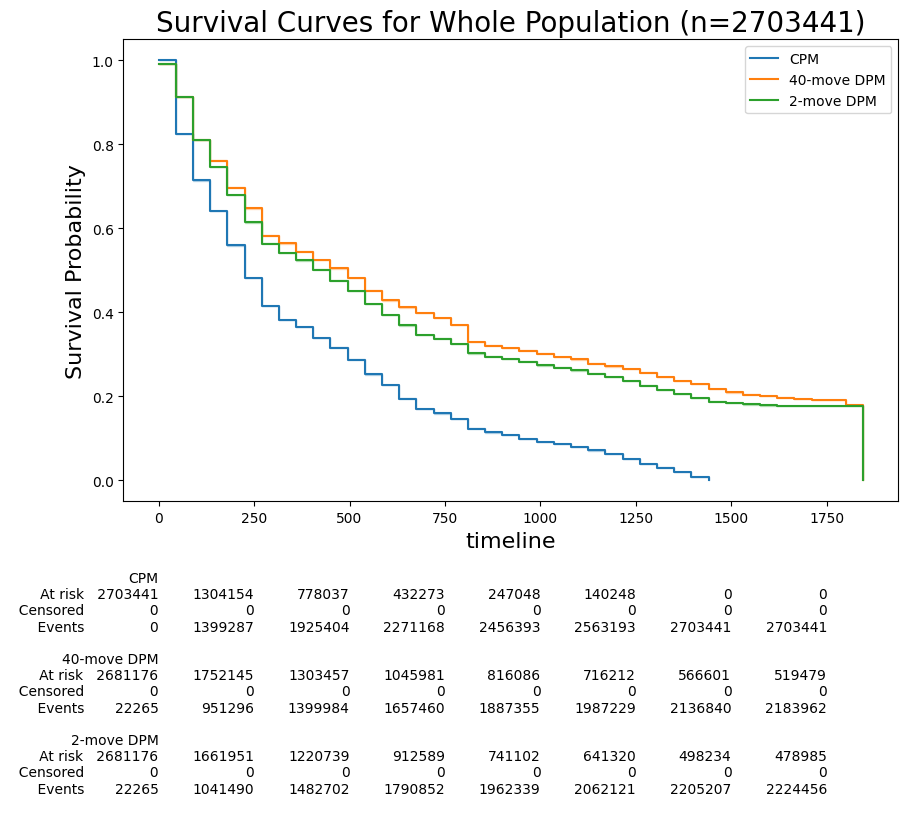

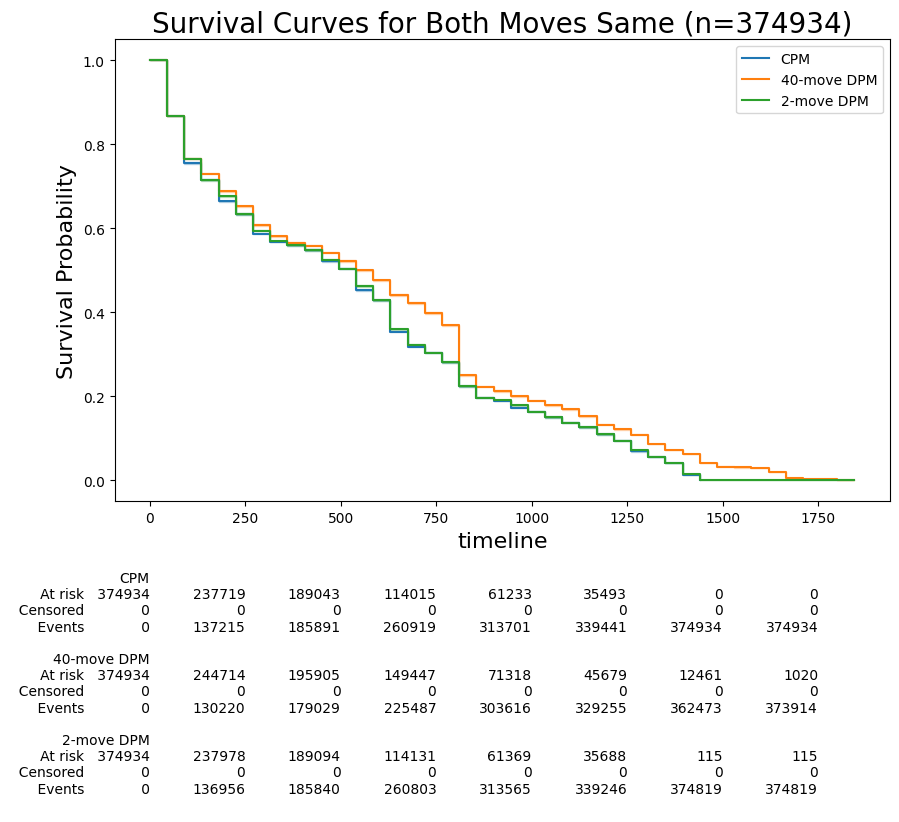

In [ ]:
ec_pop_sets = {"Whole Population" : None,
       #         "Whole Population With DPM Trial Change": ["both_diff", "first_same_only", "second_same_only"],
            "Both Moves Same" : ["both_same"],
       #     "Both Diff" : ["both_diff"],
       #     "First Same Only" : ["first_same_only"],
       #     "Second Same Only" : ["second_same_only"],
       #     "EC1" : ['second_same_only', 'both_diff'],
       #     "Not EC1": ['first_same_only', 'both_same'],
}


all_hr_df = pd.DataFrame()
all_metrics_trial_df = pd.DataFrame()
all_metrics_full_df = pd.DataFrame()
all_benefit_stats_df = pd.DataFrame()

for curr_id in ec_pop_sets.keys():
  print(curr_id)
  if ec_pop_sets[curr_id] is None:
    study_population = analysis_df
  else:
    study_population = analysis_df[analysis_df['EC_category'].isin(ec_pop_sets[curr_id])]
    excluded_population = analysis_df[~analysis_df['EC_category'].isin(ec_pop_sets[curr_id])]
    curr_metrics_trial = get_classifier_metrics(study_population, excluded_population, curr_id)
    all_metrics_trial_df = pd.concat([all_metrics_trial_df, curr_metrics_trial], ignore_index=True)
    curr_metrics_full = get_classifier_metrics(study_population, excluded_population, curr_id, mode='full')
    all_metrics_full_df = pd.concat([all_metrics_full_df, curr_metrics_full], ignore_index=True)
  benefit_stats_df = calc_benefit_stats(study_population,curr_id)
  #print(benefit_stats_df)
  all_benefit_stats_df = pd.concat([all_benefit_stats_df, benefit_stats_df], ignore_index=True)
  plot_km(study_population,curr_id,os.path.join(analysis_path,f'km_{curr_id}.png'))
  #hr_df = calc_hazard_ratio(study_population,curr_id,os.path.join(analysis_path,f'hr_{curr_id}.txt'))
  #all_hr_df = pd.concat([all_hr_df, hr_df], ignore_index=True)
  #all_hr_df.to_csv(os.path.join(analysis_path, 'all_hr_df.csv'), index=False)

# calc EC performacnce stats
print("trial metrics")
print(all_metrics_trial_df)
all_metrics_trial_df.to_csv(os.path.join(analysis_path, 'trial_metrics_df.csv'), index=False)
print()
all_metrics_full_df.to_csv(os.path.join(analysis_path, 'full_metrics_df.csv'), index=False)
print("full metrics")
print(all_metrics_full_df)
print()
print(all_benefit_stats_df)
all_benefit_stats_df.to_csv(os.path.join(analysis_path, 'all_benefit_stats_df.csv'), index=False)

<ipython-input-58-0bdfaa9d8d87>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=18)


The plot has been saved to /content/drive/MyDrive/dpmTrialResults/output_mapping_Oct24/analysis/revision_3/km_No Increased Benefit from Full DPM past Trial.png.
Hazard Ratio between Survival_CPM and Survival_DPM for No Increased Benefit from Full DPM past Trial:
                               coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                                  
Survival_Type_Survival_DPM -3.53263   0.029228  0.004624       -3.541692   

                            coef upper 95%  exp(coef) lower 95%  \
covariate                                                         
Survival_Type_Survival_DPM       -3.523568             0.028964   

                            exp(coef) upper 95%  cmp to           z    p  \
covariate                                                                  
Survival_Type_Survival_DPM             0.029494     0.0 -764.053714  0.0   

                            -log2(p)  
covariate                             

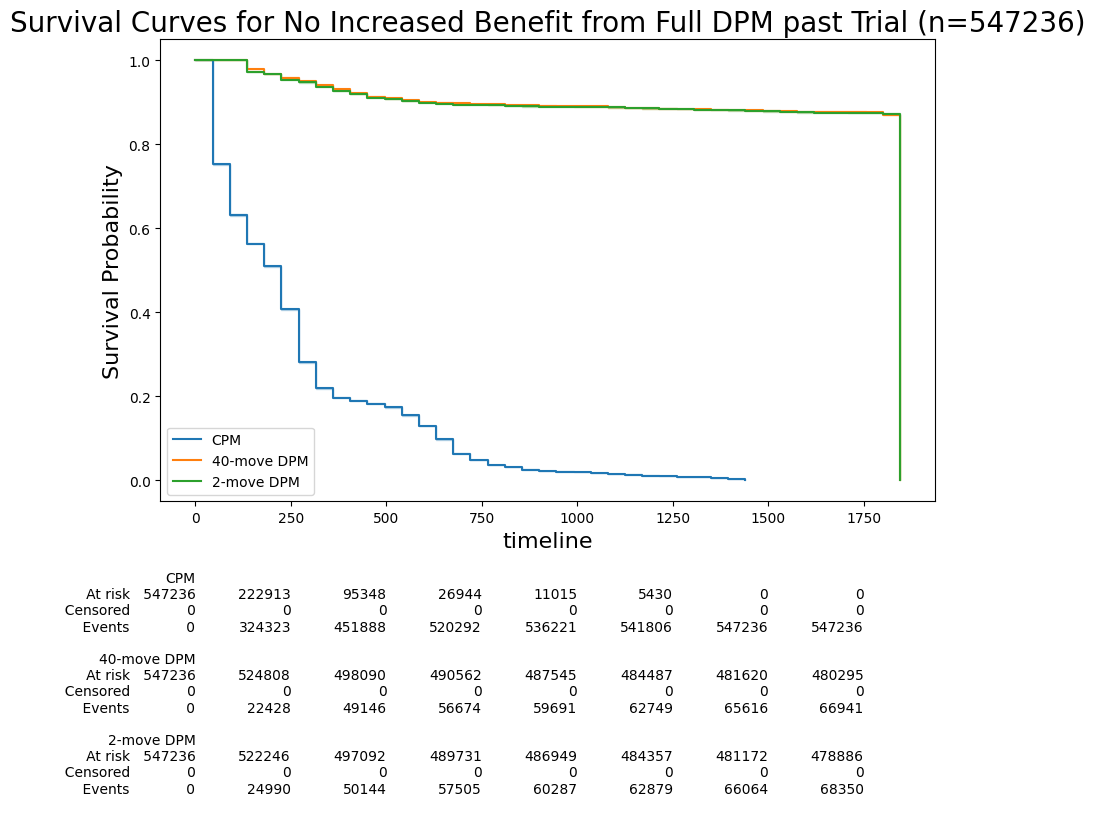

In [ ]:
curr_id = 'No Increased Benefit from Full DPM past Trial'
study_population = analysis_df[(analysis_df['Extraordinary_Benefit'] == False) & (analysis_df['benefit_DPMtrial'] == True)]
plot_km(study_population,curr_id,os.path.join(analysis_path,f'km_{curr_id}.png'))
hr_df = calc_hazard_ratio(study_population,curr_id,os.path.join(analysis_path,f'hr_{curr_id}.txt'))
#hr_df.to_csv(os.path.join(analysis_path, f'{curr_id}hr_df.csv'), index=False)

In [ ]:
study_population = analysis_df[(analysis_df['benefit_DPMtrial'] == True)]
ec_counts = study_population['EC_category'].value_counts()
print(ec_counts)
print((ec_counts.get('second_same_only', 0) + ec_counts.get('both_diff', 0))/len(study_population))

EC_category
both_diff           312119
second_same_only    261122
first_same_only      33953
both_same              128
Name: count, dtype: int64
0.9438831460082131


In [ ]:
ec_counts = study_population['EC_category'].value_counts()
print(ec_counts)
print((ec_counts.get('second_same_only', 0) + ec_counts.get('both_diff', 0))/len(study_population))

EC_category
both_diff           263105
second_same_only    255672
first_same_only      28344
both_same              115
Name: count, dtype: int64
0.947995014947847


# old code

Whole Population


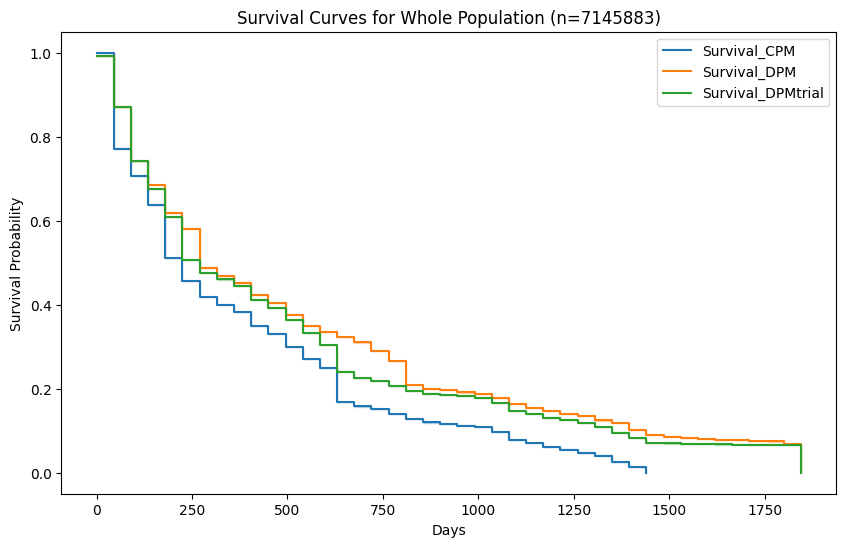

Hazard Ratio between Survival_CPM and Survival_DPM for Whole Population:
                                      Results: PHReg
Model:                             PH Reg               Sample size:              14291766
Dependent variable:                Days                 Num. events:              14291766
Ties:                              Breslow                                                
------------------------------------------------------------------------------------------
                                    log HR log HR SE   HR       t     P>|t|  [0.025 0.975]
------------------------------------------------------------------------------------------
Survival_Type_Survival_DPM[T.True] -0.3608    0.0005 0.6971 -656.3547 0.0000 0.6964 0.6979
Confidence intervals are for the hazard ratios

Hazard Ratio between Survival_CPM and Survival_DPMtrial for Whole Population:
                                        Results: PHReg
Model:                              PH Reg              

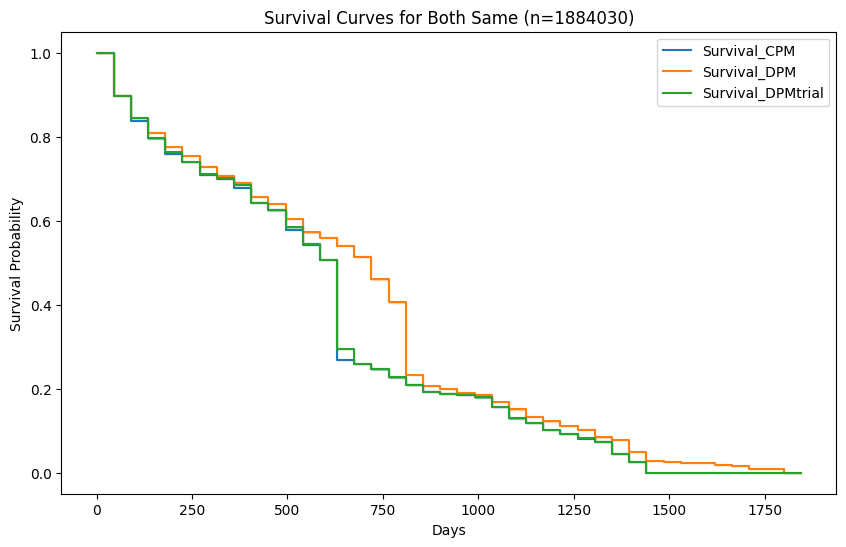

Hazard Ratio between Survival_CPM and Survival_DPM for Both Same:
                                      Results: PHReg
Model:                            PH Reg                Sample size:               3768060
Dependent variable:               Days                  Num. events:               3768060
Ties:                             Breslow                                                 
------------------------------------------------------------------------------------------
                                    log HR log HR SE   HR       t     P>|t|  [0.025 0.975]
------------------------------------------------------------------------------------------
Survival_Type_Survival_DPM[T.True] -0.2111    0.0010 0.8097 -201.9172 0.0000 0.8080 0.8113
Confidence intervals are for the hazard ratios

Hazard Ratio between Survival_CPM and Survival_DPMtrial for Both Same:
                                       Results: PHReg
Model:                             PH Reg                 Sample size: 

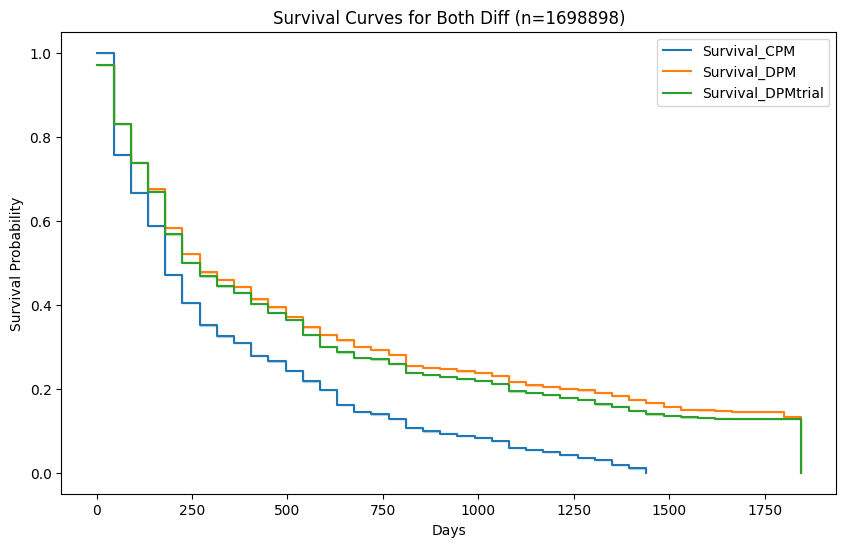

Hazard Ratio between Survival_CPM and Survival_DPM for Both Diff:
                                      Results: PHReg
Model:                            PH Reg                Sample size:               3397796
Dependent variable:               Days                  Num. events:               3397796
Ties:                             Breslow                                                 
------------------------------------------------------------------------------------------
                                    log HR log HR SE   HR       t     P>|t|  [0.025 0.975]
------------------------------------------------------------------------------------------
Survival_Type_Survival_DPM[T.True] -0.5095    0.0012 0.6008 -437.2874 0.0000 0.5994 0.6022
Confidence intervals are for the hazard ratios

Hazard Ratio between Survival_CPM and Survival_DPMtrial for Both Diff:
                                        Results: PHReg
Model:                               PH Reg                 Sample siz

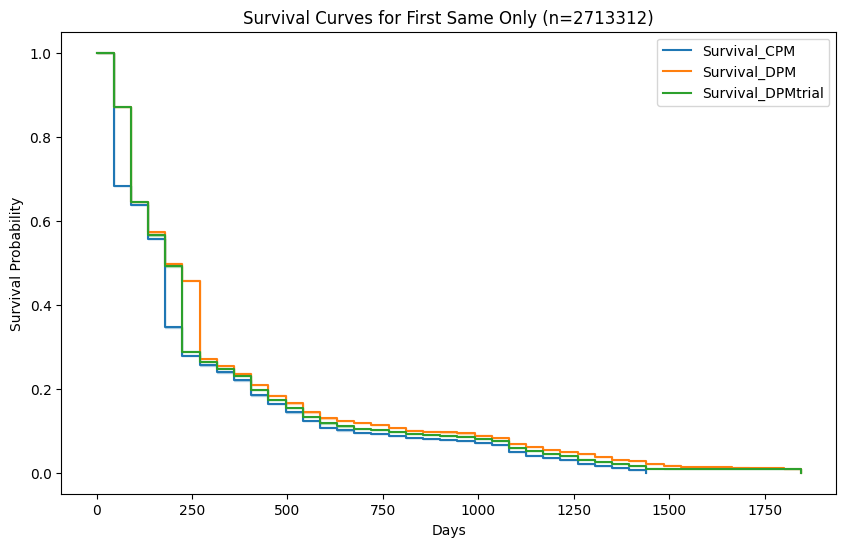

Hazard Ratio between Survival_CPM and Survival_DPM for First Same Only:
                                      Results: PHReg
Model:                            PH Reg                Sample size:               5426624
Dependent variable:               Days                  Num. events:               5426624
Ties:                             Breslow                                                 
------------------------------------------------------------------------------------------
                                    log HR log HR SE   HR       t     P>|t|  [0.025 0.975]
------------------------------------------------------------------------------------------
Survival_Type_Survival_DPM[T.True] -0.1922    0.0009 0.8252 -221.4274 0.0000 0.8238 0.8266
Confidence intervals are for the hazard ratios

Hazard Ratio between Survival_CPM and Survival_DPMtrial for First Same Only:
                                        Results: PHReg
Model:                               PH Reg               

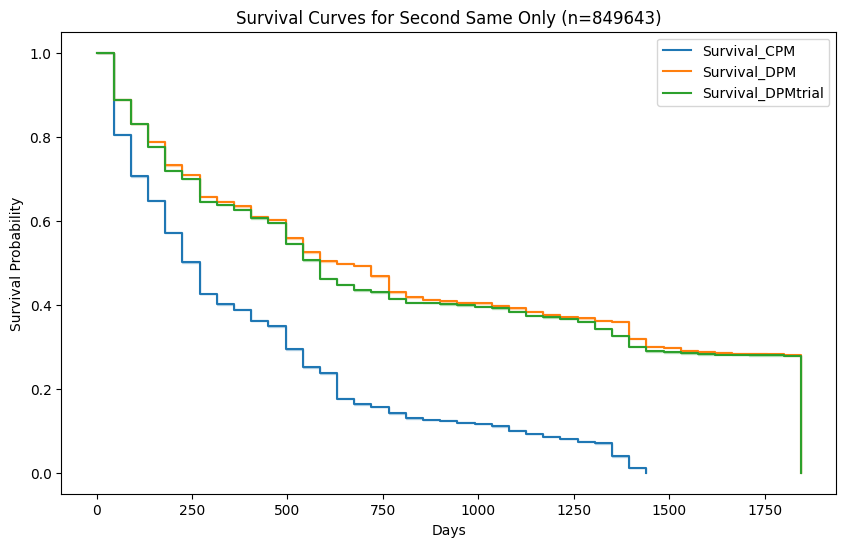

Hazard Ratio between Survival_CPM and Survival_DPM for Second Same Only:
                                      Results: PHReg
Model:                            PH Reg                Sample size:               1699286
Dependent variable:               Days                  Num. events:               1699286
Ties:                             Breslow                                                 
------------------------------------------------------------------------------------------
                                    log HR log HR SE   HR       t     P>|t|  [0.025 0.975]
------------------------------------------------------------------------------------------
Survival_Type_Survival_DPM[T.True] -0.9260    0.0018 0.3961 -523.1596 0.0000 0.3948 0.3975
Confidence intervals are for the hazard ratios

Hazard Ratio between Survival_CPM and Survival_DPMtrial for Second Same Only:
                                        Results: PHReg
Model:                               PH Reg             

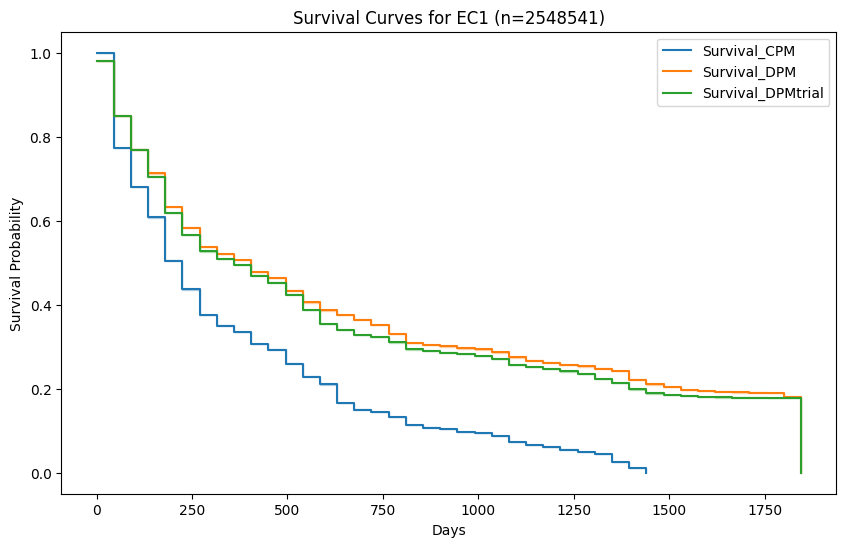

Hazard Ratio between Survival_CPM and Survival_DPM for EC1:
                                      Results: PHReg
Model:                            PH Reg                Sample size:               5097082
Dependent variable:               Days                  Num. events:               5097082
Ties:                             Breslow                                                 
------------------------------------------------------------------------------------------
                                    log HR log HR SE   HR       t     P>|t|  [0.025 0.975]
------------------------------------------------------------------------------------------
Survival_Type_Survival_DPM[T.True] -0.6435    0.0010 0.5254 -661.3242 0.0000 0.5244 0.5265
Confidence intervals are for the hazard ratios

Hazard Ratio between Survival_CPM and Survival_DPMtrial for EC1:
                                        Results: PHReg
Model:                               PH Reg                 Sample size:          

In [ ]:



if not os.path.exists():

study_population = get_pop_by_EC_category()

pop_sets = {"Whole Population" : None,
            "Both Same" : ["both_same"],
            "Both Diff" : ["both_diff"],
            "First Same Only" : ["first_same_only"],
            "Second Same Only" : ["second_same_only"],
            "EC1" : ['second_same_only', 'both_diff'],
}


for curr_id in pop_sets.keys():
  print(curr_id)

  plot_km(study_population,curr_id)
  #calc_hazard_ratio(study_population),curr_id)
  calc_hazard_ratio_2(study_population,curr_id)


Whole Population


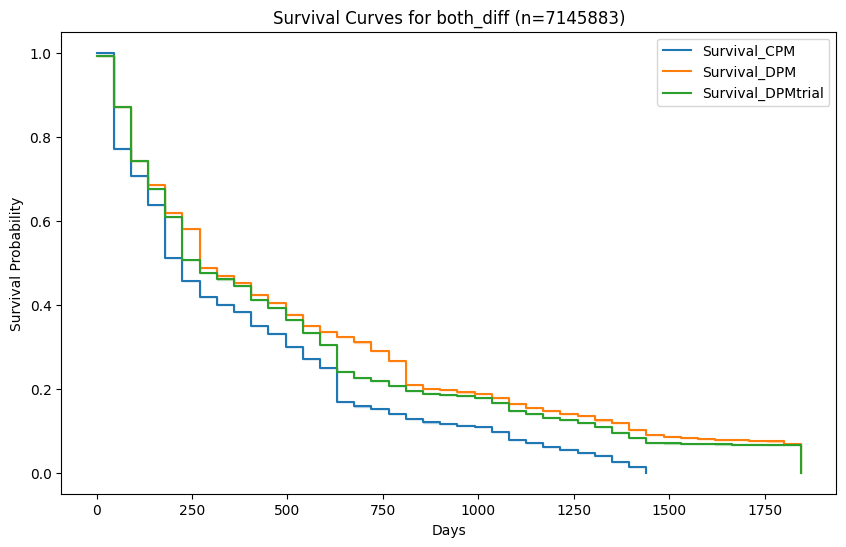

Hazard Ratio between Survival_CPM and Survival_DPM for both_diff:
                                      coef  exp(coef)  se(coef)  \
covariate                                                         
C(Survival_Type)[T.Survival_DPM] -0.391405   0.676106  0.000551   

                                  coef lower 95%  coef upper 95%  \
covariate                                                          
C(Survival_Type)[T.Survival_DPM]       -0.392485       -0.390325   

                                  exp(coef) lower 95%  exp(coef) upper 95%  \
covariate                                                                    
C(Survival_Type)[T.Survival_DPM]             0.675376             0.676837   

                                  cmp to          z    p  -log2(p)  
covariate                                                           
C(Survival_Type)[T.Survival_DPM]     0.0 -710.27328  0.0       inf  

Hazard Ratio between Survival_CPM and Survival_DPMtrial for both_diff:
             

In [ ]:
pop_sets = {"Whole Population" : None,

}

for curr_id in pop_sets.keys():
  print(curr_id)
  study_population = get_pop_by_EC_category(pop_sets[curr_id])
  plot_km(study_population,curr_id)
  calc_hazard_ratio(study_population,curr_id)


['both_diff']

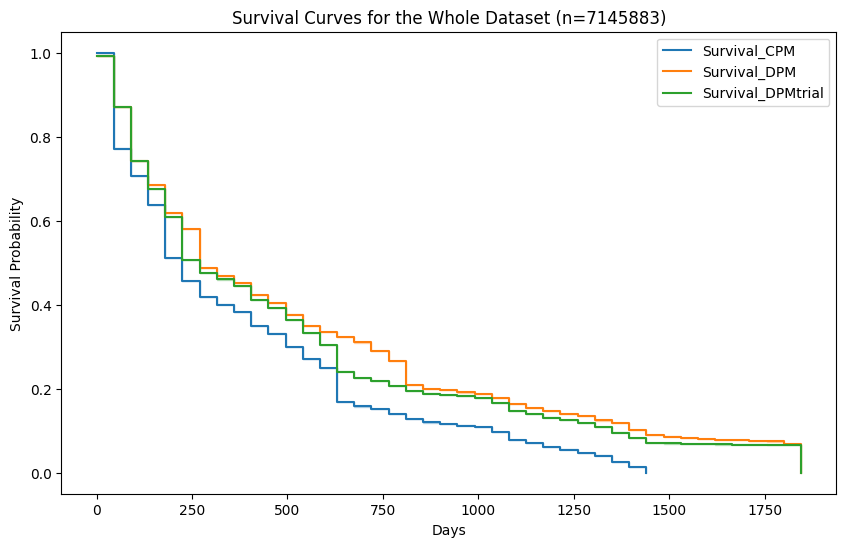

Hazard Ratio between Survival_CPM and Survival_DPM for the Whole Dataset:
                                      coef  exp(coef)  se(coef)  \
covariate                                                         
C(Survival_Type)[T.Survival_DPM] -0.391405   0.676106  0.000551   

                                  coef lower 95%  coef upper 95%  \
covariate                                                          
C(Survival_Type)[T.Survival_DPM]       -0.392485       -0.390325   

                                  exp(coef) lower 95%  exp(coef) upper 95%  \
covariate                                                                    
C(Survival_Type)[T.Survival_DPM]             0.675376             0.676837   

                                  cmp to          z    p  -log2(p)  
covariate                                                           
C(Survival_Type)[T.Survival_DPM]     0.0 -710.27328  0.0       inf  

Hazard Ratio between Survival_CPM and Survival_DPMtrial for the Whole Datase

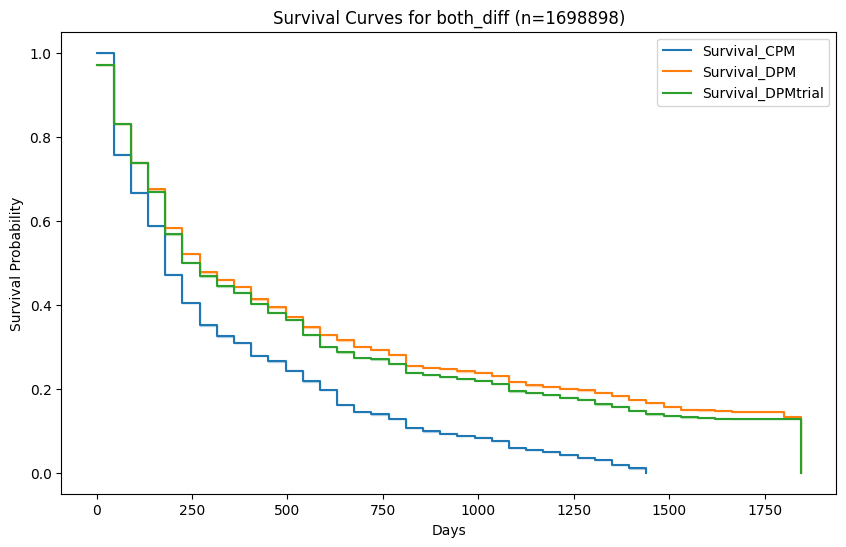

TypeError: cannot safely cast non-equivalent object to int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter

# Assuming df is your study_population DataFrame
df = study_population_over0

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Function to calculate hazard ratios for subsets defined by EC_category
def calculate_hazard_ratios(df, category=None):
    if category:
        # Filter the dataframe by the given category
        df_subset = df[df['EC_category'] == category]
    else:
        df_subset = df

    # Plot survival curves for each Survival column for the subset
    plt.figure(figsize=(10, 6))

    for column in ['Survival_CPM', 'Survival_DPM', 'Survival_DPMtrial']:
        kmf.fit(df_subset[column], event_observed=[1]*len(df_subset))  # Adjust event_observed if needed
        kmf.plot_survival_function(label=column)

    if category:
        plt.title(f'Survival Curves for {category} (n={len(df_subset)})')
    else:
        plt.title(f'Survival Curves for the Whole Dataset (n={len(df_subset)})')

    plt.xlabel('Days')
    plt.ylabel('Survival Probability')
    plt.legend()
    plt.show()

    # Prepare the data for CoxPHFitter to compare Survival_CPM and Survival_DPM
    df_long_cpm_dpm = pd.melt(df_subset, id_vars=['Parameter_ID'], value_vars=['Survival_CPM', 'Survival_DPM'],
                              var_name='Survival_Type', value_name='Days')

    # Add an event column (assuming all events are observed)
    df_long_cpm_dpm['Event'] = 1

    # Initialize the CoxPHFitter
    cph_cpm_dpm = CoxPHFitter()

    # Fit the Cox Proportional Hazards model to compare Survival_CPM and Survival_DPM
    cph_cpm_dpm.fit(df_long_cpm_dpm, duration_col='Days', event_col='Event', formula="C(Survival_Type)")

    if category:
        print(f"Hazard Ratio between Survival_CPM and Survival_DPM for {category}:")
    else:
        print("Hazard Ratio between Survival_CPM and Survival_DPM for the Whole Dataset:")
    print(cph_cpm_dpm.summary)

    # Prepare the data for CoxPHFitter to compare Survival_CPM and Survival_DPMtrial
    df_long_cpm_dpmtrial = pd.melt(df_subset, id_vars=['Parameter_ID'], value_vars=['Survival_CPM', 'Survival_DPMtrial'],
                                   var_name='Survival_Type', value_name='Days')

    # Add an event column (assuming all events are observed)
    df_long_cpm_dpmtrial['Event'] = 1

    # Initialize the CoxPHFitter
    cph_cpm_dpmtrial = CoxPHFitter()

    # Fit the Cox Proportional Hazards model to compare Survival_CPM and Survival_DPMtrial
    cph_cpm_dpmtrial.fit(df_long_cpm_dpmtrial, duration_col='Days', event_col='Event', formula="C(Survival_Type)")

    if category:
        print(f"\nHazard Ratio between Survival_CPM and Survival_DPMtrial for {category}:")
    else:
        print("\nHazard Ratio between Survival_CPM and Survival_DPMtrial for the Whole Dataset:")
    print(cph_cpm_dpmtrial.summary)

# Calculate hazard ratios for the whole dataset
calculate_hazard_ratios(df)

# Get unique categories from EC_category column
categories = df['EC_category'].unique()

# Calculate hazard ratios for each category
for category in categories:
    calculate_hazard_ratios(df, category)


In [ ]:
!pip install pycox torch torchtuples


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 27.6 MB/s eta 0:00:00
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2435 sha256=9a26d4504167094e6f7b42383706f1975c368210fc45b4be2fad11ff16581749
  Stored in directory: /root/.cache/pip/wheels/a6/ff/5d/4f10de26fe5ddef243c97f13c6cf579d7

In [ ]:
!pip install pycox --upgrade

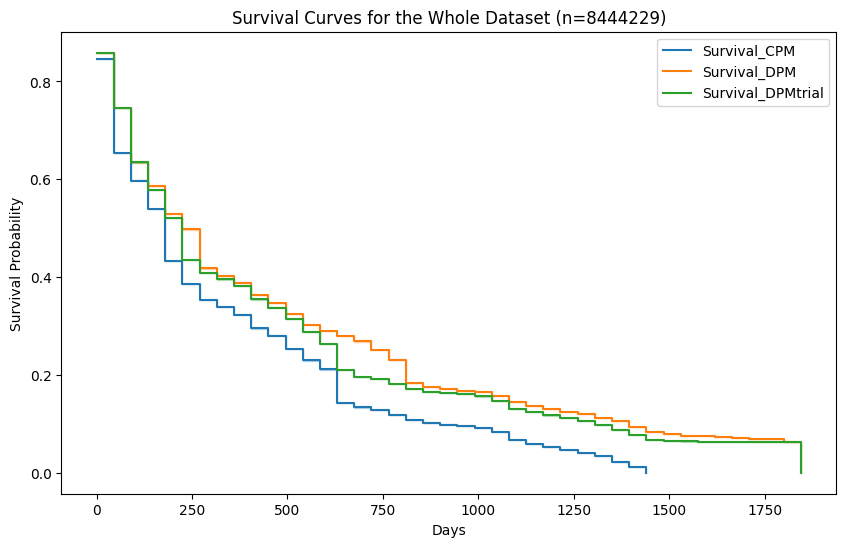

ValueError: Need to compute baseline_hazards_. E.g run `model.compute_baseline_hazards()`

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv
from lifelines import KaplanMeierFitter
import torchtuples as tt
from sklearn.preprocessing import scale

# Assuming df is your study_population DataFrame
df = study_population

# Convert survival columns to numeric, forcing errors to NaN
for column in ['Survival_CPM', 'Survival_DPM', 'Survival_DPMtrial']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Drop rows with NaN values in survival columns
df = df.dropna(subset=['Survival_CPM', 'Survival_DPM', 'Survival_DPMtrial'])

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Function to calculate hazard ratios for subsets defined by EC_category
def calculate_hazard_ratios(df, category=None):
    if category:
        # Filter the dataframe by the given category
        df_subset = df[df['EC_category'] == category]
    else:
        df_subset = df

    # Plot survival curves for each Survival column for the subset
    plt.figure(figsize=(10, 6))

    for column in ['Survival_CPM', 'Survival_DPM', 'Survival_DPMtrial']:
        kmf.fit(df_subset[column], event_observed=[1]*len(df_subset))  # Adjust event_observed if needed
        kmf.plot_survival_function(label=column)

    if category:
        plt.title(f'Survival Curves for {category} (n={len(df_subset)})')
    else:
        plt.title(f'Survival Curves for the Whole Dataset (n={len(df_subset)})')

    plt.xlabel('Days')
    plt.ylabel('Survival Probability')
    plt.legend()
    plt.show()

    # Prepare the data for CoxPH
    df_long_cpm_dpm = pd.melt(df_subset, id_vars=['Parameter_ID'], value_vars=['Survival_CPM', 'Survival_DPM'],
                              var_name='Survival_Type', value_name='Days')

    # Add an event column (assuming all events are observed)
    df_long_cpm_dpm['Event'] = 1

    # Ensure that the 'Days' column is numeric
    df_long_cpm_dpm['Days'] = pd.to_numeric(df_long_cpm_dpm['Days'], errors='coerce')

    # Drop rows with NaN values in 'Days' column
    df_long_cpm_dpm = df_long_cpm_dpm.dropna(subset=['Days'])

    # Prepare the data for pycox
    X = pd.get_dummies(df_long_cpm_dpm[['Survival_Type']], drop_first=True)
    T = df_long_cpm_dpm['Days'].values.astype('float32')
    E = df_long_cpm_dpm['Event'].values.astype('float32')

    # Scale the features
    X = scale(X).astype('float32')

    # Initialize the CoxPH model
    y = (T, E)
    model = CoxPH(tt.practical.MLPVanilla(X.shape[1], [32], 1), tt.optim.Adam)
    model.optimizer.set_lr(0.01)

    # Fit the Cox Proportional Hazards model
    model.fit(X, y, batch_size=256, epochs=100, verbose=False)

    # Evaluate the model
    surv = model.predict_surv_df(X)
    ev = EvalSurv(surv, T, E, censor_surv='km')
    concordance_index = ev.concordance_td('antolini')

    if category:
        print(f"Hazard Ratio between Survival_CPM and Survival_DPM for {category}:")
    else:
        print("Hazard Ratio between Survival_CPM and Survival_DPM for the Whole Dataset:")
    print(f"Concordance Index: {concordance_index}")

    # Prepare the data for CoxPH to compare Survival_CPM and Survival_DPMtrial
    df_long_cpm_dpmtrial = pd.melt(df_subset, id_vars=['Parameter_ID'], value_vars=['Survival_CPM', 'Survival_DPMtrial'],
                                   var_name='Survival_Type', value_name='Days')

    # Add an event column (assuming all events are observed)
    df_long_cpm_dpmtrial['Event'] = 1

    # Ensure that the 'Days' column is numeric
    df_long_cpm_dpmtrial['Days'] = pd.to_numeric(df_long_cpm_dpmtrial['Days'], errors='coerce')

    # Drop rows with NaN values in 'Days' column
    df_long_cpm_dpmtrial = df_long_cpm_dpmtrial.dropna(subset=['Days'])

    # Prepare the data for pycox
    X_trial = pd.get_dummies(df_long_cpm_dpmtrial[['Survival_Type']], drop_first=True)
    T_trial = df_long_cpm_dpmtrial['Days'].values.astype('float32')
    E_trial = df_long_cpm_dpmtrial['Event'].values.astype('float32')

    # Scale the features
    X_trial = scale(X_trial).astype('float32')

    # Initialize the CoxPH model
    y_trial = (T_trial, E_trial)
    model_trial = CoxPH(tt.practical.MLPVanilla(X_trial.shape[1], [32], 1), tt.optim.Adam)
    model_trial.optimizer.set_lr(0.01)

    # Fit the Cox Proportional Hazards model
    model_trial.fit(X_trial, y_trial, batch_size=256, epochs=100, verbose=False)

    # Evaluate the model
    surv_trial = model_trial.predict_surv_df(X_trial)
    ev_trial = EvalSurv(surv_trial, T_trial, E_trial, censor_surv='km')
    concordance_index_trial = ev_trial.concordance_td('antolini')

    if category:
        print(f"\nHazard Ratio between Survival_CPM and Survival_DPMtrial for {category}:")
    else:
        print("\nHazard Ratio between Survival_CPM and Survival_DPMtrial for the Whole Dataset:")
    print(f"Concordance Index: {concordance_index_trial}")

# Calculate hazard ratios for the whole dataset
calculate_hazard_ratios(df)

# Get unique categories from EC_category column
categories = df['EC_category'].unique()

# Calculate hazard ratios for each category
for category in categories:
    calculate_hazard_ratios(df, category)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter

# Assuming df is your study_population DataFrame
df = study_population

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Function to calculate hazard ratios for subsets defined by EC_category
def calculate_hazard_ratios(df, category=None):
    if category:
        # Filter the dataframe by the given category
        df_subset = df[df['EC_category'] == category]
    else:
        df_subset = df

    # Plot survival curves for each Survival column for the subset
    plt.figure(figsize=(10, 6))

    for column in ['Survival_CPM', 'Survival_DPM', 'Survival_DPMtrial']:
        kmf.fit(df_subset[column], event_observed=[1]*len(df_subset))  # Adjust event_observed if needed
        kmf.plot_survival_function(label=column)

    if category:
        plt.title(f'Survival Curves for {category} (n={len(df_subset)})')
    else:
        plt.title(f'Survival Curves for the Whole Dataset (n={len(df_subset)})')

    plt.xlabel('Days')
    plt.ylabel('Survival Probability')
    plt.legend()
    plt.show()

    # Prepare the data for CoxPHFitter to compare Survival_CPM and Survival_DPM
    df_long_cpm_dpm = pd.melt(df_subset, id_vars=['Parameter_ID'], value_vars=['Survival_CPM', 'Survival_DPM'],
                              var_name='Survival_Type', value_name='Days')

    # Add an event column (assuming all events are observed)
    df_long_cpm_dpm['Event'] = 1

    # Initialize the CoxPHFitter
    cph_cpm_dpm = CoxPHFitter()

    # Fit the Cox Proportional Hazards model to compare Survival_CPM and Survival_DPM
    cph_cpm_dpm.fit(df_long_cpm_dpm, duration_col='Days', event_col='Event', formula="C(Survival_Type)")

    if category:
        print(f"Hazard Ratio between Survival_CPM and Survival_DPM for {category}:")
    else:
        print("Hazard Ratio between Survival_CPM and Survival_DPM for the Whole Dataset:")
    print(cph_cpm_dpm.summary)

    # Prepare the data for CoxPHFitter to compare Survival_CPM and Survival_DPMtrial
    df_long_cpm_dpmtrial = pd.melt(df_subset, id_vars=['Parameter_ID'], value_vars=['Survival_CPM', 'Survival_DPMtrial'],
                                   var_name='Survival_Type', value_name='Days')

    # Add an event column (assuming all events are observed)
    df_long_cpm_dpmtrial['Event'] = 1

    # Initialize the CoxPHFitter
    cph_cpm_dpmtrial = CoxPHFitter()

    # Fit the Cox Proportional Hazards model to compare Survival_CPM and Survival_DPMtrial
    cph_cpm_dpmtrial.fit(df_long_cpm_dpmtrial, duration_col='Days', event_col='Event', formula="C(Survival_Type)")

    if category:
        print(f"\nHazard Ratio between Survival_CPM and Survival_DPMtrial for {category}:")
    else:
        print("\nHazard Ratio between Survival_CPM and Survival_DPMtrial for the Whole Dataset:")
    print(cph_cpm_dpmtrial.summary)

# Calculate hazard ratios for the whole dataset
calculate_hazard_ratios(df)

# Get unique categories from EC_category column
categories = df['EC_category'].unique()

# Calculate hazard ratios for each category
for category in categories:
    calculate_hazard_ratios(df, category)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter

df = study_population

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Plot survival curves for each Survival column
plt.figure(figsize=(10, 6))

for column in ['Survival_CPM', 'Survival_DPM', 'Survival_DPMtrial']:
    kmf.fit(df[column], event_observed=[1]*len(df))  # Assuming all events are observed
    kmf.plot_survival_function(label=column)

plt.title('Survival Curves')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

# Calculate hazard ratios using Cox Proportional Hazards model
cph = CoxPHFitter()

# Prepare the data for CoxPHFitter
df_long = pd.melt(df, id_vars=['Parameter_ID'], value_vars=['Survival_CPM', 'Survival_DPM', 'Survival_DPMtrial'],
                  var_name='Survival_Type', value_name='Days')

# Add an event column (assuming all events are observed)
df_long['Event'] = 1

# Fit the Cox Proportional Hazards model
cph.fit(df_long, duration_col='Days', event_col='Event', formula="C(Survival_Type)")

# Print the summary of the Cox model which includes hazard ratios
print(cph.summary)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Sample DataFrame creation for demonstration purposes

df = study_population[study_population['EC_category'] == "both_diff"]

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Plot survival curves for each Survival column
plt.figure(figsize=(10, 6))

for column in ['Survival_CPM', 'Survival_DPM', 'Survival_DPMtrial']:
    kmf.fit(df[column], event_observed=[1]*len(df))  # Assuming all events are observed
    kmf.plot_survival_function(label=column)

plt.title('Survival Curves')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()


In [ ]:
all_hr_df

,Comparison,Hazard_Ratio,Population_ID
0,Survival_CPM vs Survival_DPM,0.676106,Whole Population
1,Survival_CPM vs Survival_DPMtrial,0.735255,Whole Population
2,Survival_CPM vs Survival_DPM,0.784014,Both Same
3,Survival_CPM vs Survival_DPMtrial,0.987166,Both Same
4,Survival_CPM vs Survival_DPM,0.580292,Both Diff
5,Survival_CPM vs Survival_DPMtrial,0.616170,Both Diff
6,Survival_CPM vs Survival_DPM,0.806862,First Same Only
7,Survival_CPM vs Survival_DPMtrial,0.863294,First Same Only
8,Survival_CPM vs Survival_DPM,0.375264,Second Same Only
9,Survival_CPM vs Survival_DPMtrial,0.400174,Second Same Only
